## Install dependencies


In [1]:
from google.colab import files
!pip install textstat
!pip install --upgrade transformers
!pip install simpletransformers
!pip install transformers
!pip install datasets
!pip install evaluate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 103.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 940.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 92.4 MB/s e

In [2]:
!sudo apt-get install texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libkpathsea6 libptexenc1 libsynctex2 libteckit0 libtexlua53 libtexluajit2
  libwoff1 libzzip-0-13 lmodern poppler-data t1utils tex-common texlive-base
  texlive-binaries texlive-latex-base xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  poppler-utils ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum debhelper gv | postscript-viewer perl-tk xpdf
  | pdf-viewer xzdec texlive-latex-base-doc texlive-latex-recommended-doc
  texlive-luatex texlive-pstricks
The following NEW packages will be installed:
  dvisvgm fonts-droid-fa

#1. Referenceless simplicity metrics: i.e, FKGL etc

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
#from simpletransformers.classification import ClassificationModel, ClassificationArgs
import numpy as np
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/TEC/Proyecto/Investigacion'

Mounted at /content/drive
 Alpaca						   Instrucciones_Plan_de_Proyecto.pdf
'Analisis cualitativo de seleccion.gdoc'	   Instrucciones_Requerimientos_de_Software.pdf
'Aplicacion Metricas completas.ipynb'		   Investigacion.ipynb
'BRENES BERTA - Resultado Ficha Proyecto.pdf'	   llama
 Comparacion_simplificación_sample.xlsx		   Llama
 Dataset5000					   manually_utf8.csv
 dataset_replicas2.csv				   Mavin_A_Rolls_Royce_EARS_RE09_Paperaccepted.pdf
 dataset_replicas3.csv				   Metrics_sari_bleu.ipynb
 dataset_replicas4.csv				   Pegasus.ipynb
 dataset_replicas5.csv				  'Plan de proyecto.gdoc'
'Documento de Diseño-Bertha Brenes.gdoc'	   Poster.gdoc
'Documento de requerimiento.gdoc'		  'Probando el dataset.ipynb'
'Documento para el profe.gdoc'			  'Recoleccion de datos.gdoc'
 FastChat.ipynb					   salidaPegasus2.csv
'Ficha de presentación de CE-5302 BerthaBB.docx'   sampleLlama2.csv
 FinalRep.csv					   samples
 Financial_Dataset_in_Spanish.pdf		  'Tarea 2.gdoc'
'Hoja de cálculo sin tít

## Load the dataset

In [4]:
from sklearn import metrics
import os
import numpy as np
import pandas as pd
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import RegexpTokenizer
from pathlib import Path

nltk.download('punkt')
nltk.download('stopwords')

def read_csv_libre_translate(path_str, columnName, complexName):
    #accumulate all the sentences both simple and complex
    simple_texts_all = []
    complex_texts_all = []
    wrong_lines_counter = 0
    row_counter = 0
    #must be read by chunks as the csv is too big
    for chunk_data_frame in pd.read_csv(path_str, chunksize=1):
        print(chunk_data_frame)
        #get simple texts in spanish
        #this is an nd array
        simple_text_array = str(chunk_data_frame[columnName].values[0])
        #preprocess string
        simple_text_preprocessed = simple_text_array

        #get complex texts in spanish
        complex_text_array = str(chunk_data_frame[complexName].values[0])
        complex_text_preprocessed = complex_text_array
        try:
            #append
            if(not simple_text_preprocessed == complex_text_preprocessed):
                simple_texts_all += [simple_text_preprocessed]
                complex_texts_all += [complex_text_preprocessed]
        except:
            print("A wrong line was not parsed ", wrong_lines_counter, " from row ", row_counter)
            wrong_lines_counter += 1
        row_counter += 1
        #if(row_counter == 5000): break


    #create the labels
    labels_simple = np.zeros(len(simple_texts_all), dtype = int)
    labels_complex = np.ones(len(complex_texts_all), dtype = int)
    labels_all = labels_simple.tolist() + labels_complex.tolist()
    #all the data
    data_all = simple_texts_all + complex_texts_all
    #data frame with columns
    column_names = ['label', 'text']
    #data frame with definitive training data
    data_frame_training = pd.DataFrame(list(zip(labels_all, data_all)), columns = ['label', 'text'])
    #value = data_frame_training["text"].loc[0]
    return data_frame_training

def readExcelSeveral(path_str):
  #accumulate all the sentences both simple and complex
  simple_Llama_texts_all = []
  simple_Alpaca_texts_all = []
  simple_Pegasus_texts_all = []
  simple_FastChat_texts_all = []
  complex_texts_all = []
  wrong_lines_counter = 0
  row_counter = 0
  #must be read by chunks as the csv is too big
  data_csv = pd.read_excel(path_file_dataset)
  complex_texts_all = data_csv.complex.values[0]
  simple_Llama_texts_all = data_csv.simpleLlama.values[0]
  simple_Alpaca_texts_all = data_csv.simpleAlpaca.values[0]
  simple_Pegasus_texts_all = data_csv.simplePegasus[0]
  simple_FastChat_texts_all = data_csv.simpleFastChat.values[0]


  #create the labels
  labels_simple_Llama = np.zeros(len(simple_Llama_texts_all), dtype = int)
  labels_simple_Alpaca = np.zeros(len(simple_Alpaca_texts_all), dtype = int)
  labels_simple_Pegasus = np.zeros(len(simple_Pegasus_texts_all), dtype = int)
  labels_simple_FastChat = np.zeros(len(simple_FastChat_texts_all), dtype = int)
  labels_complex = np.ones(len(complex_texts_all), dtype = int)
  labels_all = labels_simple_Llama.tolist() + labels_complex.tolist() + labels_simple_Alpaca.tolist()+ labels_simple_Pegasus.tolist() + labels_simple_FastChat.tolist()
  #all the data
  data_all = simple_Llama_texts_all + simple_Alpaca_texts_all + simple_Pegasus_texts_all +simple_FastChat_texts_all + complex_texts_all
  #data frame with columns
  column_names = ['label', 'text']
  #data frame with definitive training data
  data_frame_training = pd.DataFrame(list(zip(labels_all, data_all)), columns = ['label', 'text'])
  #value = data_frame_training["text"].loc[0]
  return data_frame_training





'''
Function to split dataset in training, validation and testing
data: dataset named seg
perc: list with the 3 percentages to split dataset
seed: int
'''

def split(data, perc, seed):
    np.random.seed(seed)

    # split trainning
    msk = np.random.rand(len(data)) < perc[0]
    train = data[msk]
    rest = data[~msk]

    # number of validation samples
    nVa=len(data)*perc[1]

    # get msk to split validation and testing
    msk2 = np.random.rand(len(rest)) < (nVa/len(rest))

    # split validation and testing
    vali = rest.iloc[msk2, :]
    test = rest.iloc[~msk2, :]

    return train, vali, test


'''
tokenize function used by train.map
'''
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length = max_lenght)



'''
Function for metric computation
'''

def compute_metrics(eval_pred):
    metric = evaluate.load("accuracy")
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Metrics implementation
For more information see https://github.com/textstat/textstat

Based upon the package texstat we aim to use the following metrics applicable to Spanish text, to measure its simplicity.

### The Flesch Reading Ease formula
In this library is also implemented for Spanish.  It scores the sentence from -Infinity to 121.22.
The formula is given by:
$$206.835-1.015\left(\frac{\textrm{total words}}{\textrm{total sentences}}\right)-84.6\left(\frac{\textrm{total syllables}}{\textrm{total words}}\right) $$

Score by	difficulty: 100 is very easy.

The Flesch-Kincaid grade level is a normalized version of this metric to fit the US grade level required by the subject to understand the text.
### The Fog Scale
The Fog readibility index estimates the complexity of a text, where the output corresponds to the school level required to understand it. It requires to calculate the number of complex words. The"complex" words consist of three or more syllables. It does not include proper nouns, familiar jargon, or compound words. Do not include common suffixes (such as -es, -ed, or -ing) as a syllable. Returns the FOG index of the given text. This is a grade formula in that a score of 9.3 means that a ninth grader would be able to read the document. Its similar to the Flesch-Kincaid grade level as it estimates the complexity of a whole text, using the following  formula.
$$0.4\left[\left(\frac{\textrm{ words}}{\textrm{sentences}}\right)+100\left(\frac{\textrm{complex words}}{\textrm{words}}\right)\right]$$

As limitations the fog index can be mislead as it considers long words which might not be the complex, such as jiraffe, as complex.

### SMOG Index
As an improvement to the Fog Scale, the Simple Measure of Gobbledygook was proposed. **It is not suitable for sentences**. It was tested to evaluate the simplicity of texts in healthcare.  It is calculated as follows:
1. Take randomly 3 ten-sentence-long observations for the text analyzed.
2. In such sentences calculate the number of polysyllables (words with 3 or more syllables).
3. Calculate the grade as $$\textrm{grade}=1.0430\sqrt{\textrm{polysyllables}\times\frac{30}{\textrm{sentences}}}+3.1291$$

**The SMOG index is not effective with sentences with less than 30 words**, as the formulae was normed with samples of 30 sentences sized.

### Automated readability index (ARI)
It is a readibility score also designed for English, which instead of using the number of polysyllables, uses the number of characters. It is less accurate, but faster to calculate. It output is scaled to fit the US grade level needed to understand the text. It is implemented as follows:
$$ 4.71\left(\frac{\textrm{characters}}{\textrm{words}}\right)+0.5\left(\frac{\textrm{words}}{\textrm{sentences}}\right)-21.43 $$


### The Coleman-Liau index
It is also a readibility index designed to measure text understandibility, and it also estimates the US grade level needed to understand the text. Like the ARI, it is based upon characters. **This metric is best suited for measuring text complexity in whole texts**.

$$C = 0.0588L - 0.296S - 15.8$$
where $L$ is the average number of characters for each 100 words, and $S$ the mean number of sentences per 100 words.

### Linsear Write
Also a readibility metric designed for English text, it also outputs the required US grade level to understand the text.
It takes a 100 word sample, meaning that it is **not designed for sentence complexity**. It is calculated in such sample as follows:
$$r=\frac{\textrm{words of 2 syllables or less} \\+3\times\textrm{words of 2 syllables or less}}{100}$$
if $r>20, \textrm{Lw}=r/2$, if not $\textrm{Lw}=r/2 - 1$


### Dale-Chall
This formulae measures comprehension difficulty, using 3000 words that US fourth-graders could reliably understand, making any word not in this group difficult.
The formula is given by:
$$0.1579\left(\frac{\textrm{difficult words}}{\textrm{words}}\times100\right)+0.0496\left(\frac{\textrm{words}}{\textrm{sentences}}\right)$$
The usage of a 3000 word thesaurus in English means that this **metric cannot be used for Spanish text complexity measurement**.

### Readibility consensus
Seems to be based upon the averaging of all the above texts, thus it cannot be used for sentences.

### Spache Readibility
For texts up to fourth grade. **Discarded because of this**.

### McAlpine EFLAW

It is based upon the concept of mini-word, defined by Rachel McAlpine, which are words of one, two or three characters. Making $w$ the number of words, $m$ the number of mini-words and $s$ the number of sentences, the McAlpine index is defined as follows:
$m=(w+m)\times s^{-1}$

And here is the scale: 1-20 (very easy to understand); 21-25 (quite easy to understand); 26-29 (a little difficult); and 30+ (very confusing).

### Language specific: Fernandez Huerta for Spanish

It is the Flesch measurement mapped for readibility in Spanish, proposed by Jose Fernandez in 1959. It is defined as follows:

$$206.84 - 0.6P-1.02F$$ where $P$ is the average number of syllables per word and $f$ the average number of words per phrase. It goes from 0 to 100, where 100 is the easier to read.

### Language specific: Szigristzt-Pasos for Spanish
It is another adaptation of Flesch's equation, defined as:
$$ 206.835 - 62.36 (S/P) - P/F$$ Where $S$ is the total number of syllables, $P$ the number of words and $F$ the number of phrases. It goes from 0 to 100 where 0 is the hardest.

### Gutierrez de Polini
Originally proposed as a whole new readibility formula from scratch for Spanish, proposed by Luisa Elena Gutiérrez de Polini (1972), it is calculated as follows:

$$ 95.2-\frac{9.7L}{P}-\frac{0.35P}{F} $$

Where: $L$ is the total number of characters, $P$ the total number of words, and $F$ the number of phrases. It measures readibility for **Spanish sixth graders, and it is not recommended for adult texts**.

### Crawford formula

It is used to calculate the years of schooling needed to understand a text. It was devised by Alan N. Crawford in 1989 . **It is only valid for elementary school** children. The equation is like this:
$$-0.205\times P + 0.049 R - 3.407$$ where $P$ is the number of sentences per each 100 words, and $R$ the number of syllables per 100 words.

Gulpease and Wiener Sachtextformel are the italian and german version of the Fleisch indices.

## Other useful metrics

1. Syllable Count
2. Lexicon Count: Can ignore punctuation
3. Chacarecter count
4. Pollysyllable count
5. Monosyllable count

Given that:
Flesch Reading: total words ,sentences, syllables, total words
fog scale, words, sentences, complex words (polysyllables)
smog: polysyllables , sentences
ARI: characters, words, sentences
Linsear write: 100 word sample, poly and not polysyllables
Dale chall: difficult words are in english
Mcalpine: miniwords, and sentences, miniwords not suitable for spanish
Gutierrez de Polini, measures number of characters, num of words and num of phrases
Crawford formula takes 100 words and measures num of sentencesthe number of syllables.

**We decided to measure:**
1. Pasos
2. Fernandez Huerta
5. Gutierrez de Polini

In [ ]:
import textstat
import string

"""
    # Function to generate features descriptors of the simple and complex sentences

    df: pandas, dataset with complex and simple sentences
    name1:  chr, column name of the complex sentences
    name2:  chr, column name of the simple sentences

    return:
    pandas dataset with the szigriszt_pazos readability score, fernandez_huerta readability score,
    number of characters including numbers, and number of words

"""

def get_metrics(input_dataframe_dataset, text_column_name = "text", label_column_name = "labels", take_complex = 0):
    matrix_scores = []
    # Loop for each sentence
    for i in range(len(input_dataframe_dataset)):
        sentence = input_dataframe_dataset[text_column_name][i]
        is_complex = input_dataframe_dataset[label_column_name][i]
        dict_scores = {}
        if(is_complex == take_complex):

          # get readability scores from each sentence
          dict_scores["fernandez_huerta"] = textstat.fernandez_huerta(sentence)
          dict_scores["szigriszt_pazos"] = textstat.szigriszt_pazos(sentence)
          dict_scores["gutierrez_polini"] = textstat.gutierrez_polini(sentence)
          dict_scores["crawford"] = textstat.crawford(sentence)
          dict_scores["syllable count"] = textstat.syllable_count(sentence)
          dict_scores["word count"] = textstat.lexicon_count(sentence)
          dict_scores["poly count"] = textstat.polysyllabcount(sentence)
          dict_scores["mono count"] = textstat.monosyllabcount(sentence)
          #get the column names
          column_names = dict_scores.keys()
          #store values
          list_values = list(dict_scores.values())
          matrix_scores += [list_values]

    # transform numpy to pandas dataframe
    data_metrics = np.array(matrix_scores)
    data_frame_metrics = pd.DataFrame(data_metrics)
    data_frame_metrics.columns = column_names
    return data_frame_metrics, column_names

## Dataset stats

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy import stats as st
import matplotlib
import pandas as pd
import scipy.stats
"""
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

import matplotlib.pyplot as plt
"""


def display_descriptive_stats(column_name, np_column_simple, np_column_complex):
  print("Display descriptive stats")
  table_values = np.zeros((5, 2))
  p_value_wilcoxon = scipy.stats.mannwhitneyu(np_column_simple, np_column_complex)
  #
  #mean
  table_values[0, 0] = np.mean(np_column_simple)
  table_values[0, 1] = np.mean(np_column_complex)
  #var
  table_values[1, 0] = np.var(np_column_simple)
  table_values[1, 1] = np.var(np_column_complex)
  #skew
  table_values[2, 0] = skew(np_column_simple)
  table_values[2, 1] = skew(np_column_complex)
  #modE
  print(np_column_simple)
  print(np_column_complex)
  table_values[3, 0] = st.mode(np_column_simple)[0]
  table_values[3, 1] = st.mode(np_column_complex)[0]
  #display table
  fig, ax = plt.subplots()

  # hide axes
  fig.patch.set_visible(False)
  ax.axis('off')
  ax.axis('tight')
  ax.table(cellText = table_values, rowLabels = ["mean", "var", "skew", "mode", ""], colLabels = [column_name + "_simple_sentences", column_name + "_complex_sentences"], loc='center')
  fig.tight_layout()
  plt.show()

  return np.mean(np_column_simple), np.std(np_column_simple), np.mean(np_column_complex), np.std(np_column_complex), np.mean(np_column_simple) - np.mean(np_column_complex), p_value_wilcoxon

def display_histogram(column_name, np_column_simple, np_column_complex, np_column_all_classes, num_bins = 20):
  fig = plt.figure(figsize=(10, 6))
  min_range = np.min(np_column_all_classes)
  max_range = np.max(np_column_all_classes)

  plt.subplot(1, 2, 1)
  plt.hist(np_column_simple, range = [min_range, max_range], bins = num_bins)
  plt.title(column_name + "_simple_sentences")
  plt.xlabel("Bin number")
  plt.ylabel("Bin count")

  plt.subplot(1, 2, 2)
  plt.hist(np_column_complex, range = [min_range, max_range], bins = num_bins)
  plt.title(column_name + "_complex_sentences")
  plt.xlabel("Bin number")
  plt.ylabel("Bin count")
  #plt.savefig(column_name + '_fig.pgf')
  plt.show()


def visualize_stats(metrics_simple_sentences, metrics_complex_sentences, name_file_dataset):
  column_names = metrics_simple_sentences.columns
  #table_summaries_values
  table_values = np.zeros((len(column_names), 6))

  #concat whole data for reference
  np_mat_simple = np.array(metrics_simple_sentences.values)
  np_mat_complex = np.array(metrics_complex_sentences.values)
  np_mat_all = np.concatenate((np_mat_simple, np_mat_complex), 0)
  column_num = 0

  #get descriptive stats and histogram for each column
  for column_name in column_names:

    data_column_simple = np_mat_simple[:, column_num]
    data_column_complex = np_mat_complex[:, column_num]
    data_column_all = np_mat_all[:, column_num]
    #display the histogram
    #display_histogram(column_name , data_column_simple, data_column_complex, data_column_all)
    #display the descriptive stats
    mean_simple, var_simple, mean_complex, var_complex, dif_complex_simple, p_value = display_descriptive_stats(column_name, data_column_simple, data_column_complex)
    #store all the table values in the tensor
    p_value = p_value.pvalue
    print("p value ", p_value)
    print("table_values ", table_values.shape)
    table_values[column_num, :] = [mean_simple, var_simple, mean_complex, var_complex, dif_complex_simple, p_value]
    column_num += 1


  rowLabels = column_names
  table_values = np.round(table_values, decimals = 9)
  print("table values after round \n ", table_values)
  colLabels = ["mu s", "sigma s", "mu c", "sigma c", "mu s - mu c", "p_value"]
  data_frame = pd.DataFrame(table_values, columns = colLabels)
  data_frame.index = rowLabels
  data_frame.round(decimals = 2)
  print("Data frame \n ", data_frame)
  #store latex file
  with open(name_file_dataset + "_stats.tex",'w') as tf:
    tf.write(data_frame.to_latex())
  return data_frame



### Manually simplified dataset

In [ ]:
path_file_dataset_man = "/content/drive/MyDrive/TEC/Proyecto/Investigacion/manually_utf8.csv"


### Alpaca 5000


In [ ]:
path_file_dataset = '/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/salidaAlpaca.csv'
columnName = "simpleAlpaca"
complexName= "complex"

In [ ]:
path_file_dataset = '/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/salidaAlpaca_Finalrep.csv'
columnName = "simple"
complexName = "Segmento"

### FastChat 5000


In [ ]:
path_file_dataset = '/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/salidaFastChat.csv'
columnName = "simpleFastChat"
complexName = "complex"

In [ ]:
path_file_dataset = '/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/salidaFastChat_Finalrep.csv'
columnName = "simple"
complexName = "Segmento"

### Pegasus 5000

In [ ]:
path_file_dataset = '/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/salidaPegasus.csv'
columnName = "simplePegasus"
complexName = "complex"

In [ ]:
path_file_dataset = '/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/salidaPegasus_Finalrep.csv'
columnName = "simple"
complexName = "Segmento"

### Llama 5000


In [ ]:
path_file_dataset = '/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/salidaLlama.csv'
columnName = "simpleLlama"
complexName = "complex"

In [ ]:
path_file_dataset = '/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/salidaLlama_Finalrep.csv'
columnName = "simple"
complexName = "Segmento"

## Procesando

Se han truncado las últimas 5000 líneas del flujo de salida.
                                                 simple  
2202   Pago mínimo: Es el importe determinado para m...  
      Unnamed: 0   id                          idFinal  \
2203        1564  113  113_LibroUAEM.Sin copyright.pdf   

                             book  \
2203  LibroUAEM.Sin copyright.pdf   

                                               Segmento  Atributo  \
2203  Presupuesto: Es el registro puntual de los ing...        88   

                                              Propuesta            idcod  \
2203  Presupuesto: Es el registro puntual de los ing...  Sugeily_DC.xlsx   

      repetida  atr0  atr1  atr2  atr3  atr4  atr5  atr6  atr7  atr8  \
2203       1.0  88.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                                                 simple  
2203   Presupuesto: Es el registro puntual de los in...  
      Unnamed: 0   id                          idFinal  \
2204        1565  11

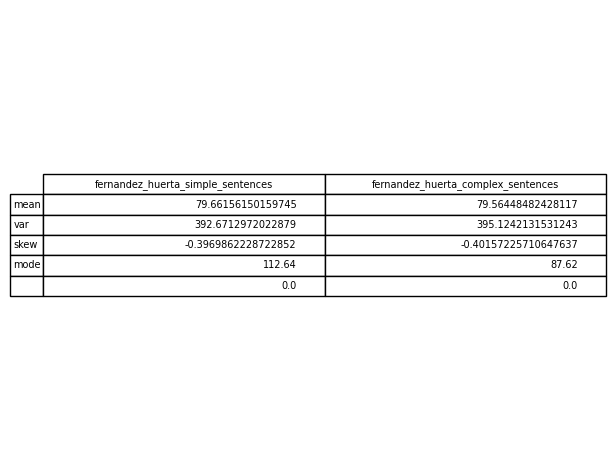

p value  0.8840380826551504
table_values  (8, 6)
Display descriptive stats
[ 59.47  81.39  63.24 ... 109.39  97.    97.  ]
[ 59.47  81.39  63.24 ... 109.39  97.    97.  ]


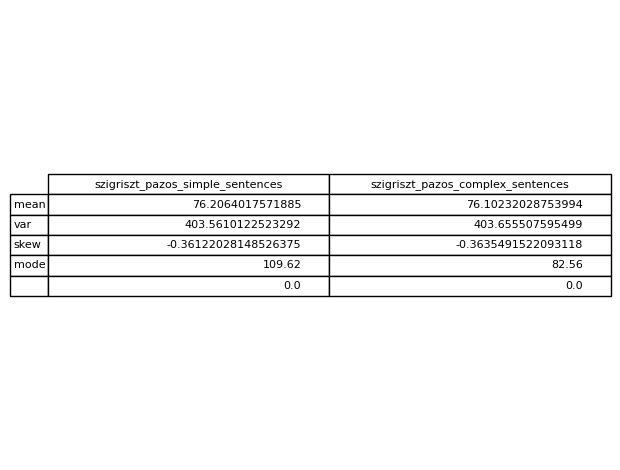

p value  0.8671843150920391
table_values  (8, 6)
Display descriptive stats
[34.24 41.87 27.29 ... 42.88 54.3  47.83]
[34.24 41.87 27.29 ... 42.88 54.3  47.83]


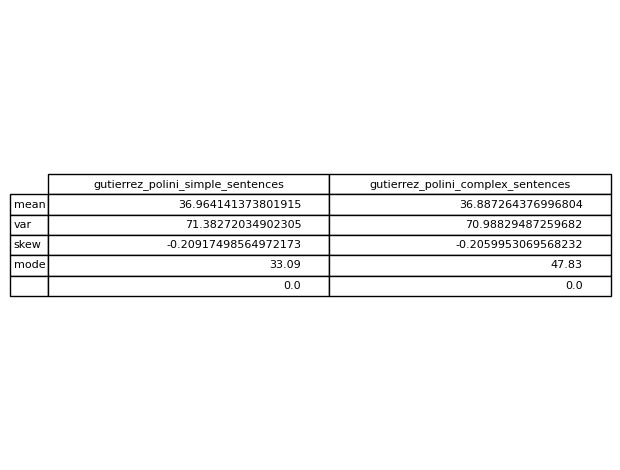

p value  0.7488678166289876
table_values  (8, 6)
Display descriptive stats
[ 4.5  3.3  5.3 ... -1.3  1.3  1.3]
[ 4.5  3.3  5.3 ... -1.3  1.3  1.3]


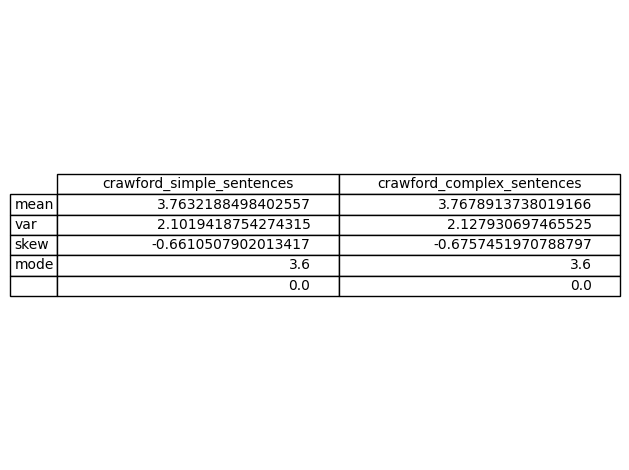

p value  0.88193508596743
table_values  (8, 6)
Display descriptive stats
[70. 48. 38. ...  6. 10. 10.]
[70. 48. 38. ...  6. 10. 10.]


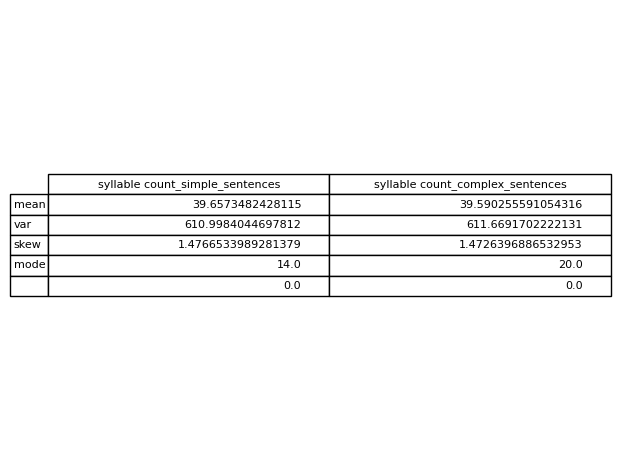

p value  0.8864909346107376
table_values  (8, 6)
Display descriptive stats
[41. 32. 19. ...  4.  6.  6.]
[41. 32. 19. ...  4.  6.  6.]


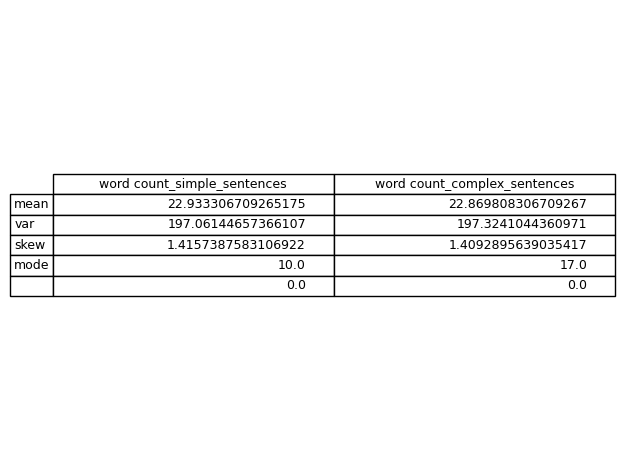

p value  0.823409534179798
table_values  (8, 6)
Display descriptive stats
[9. 4. 5. ... 0. 1. 1.]
[9. 4. 5. ... 0. 1. 1.]


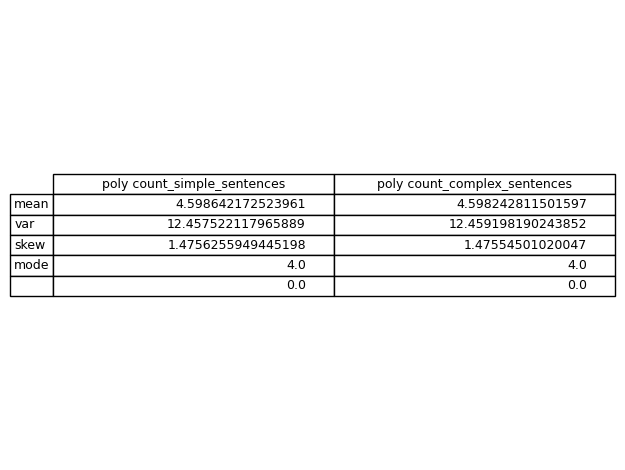

p value  0.9949786085867759
table_values  (8, 6)
Display descriptive stats
[22. 21.  8. ...  2.  3.  3.]
[22. 21.  8. ...  2.  3.  3.]


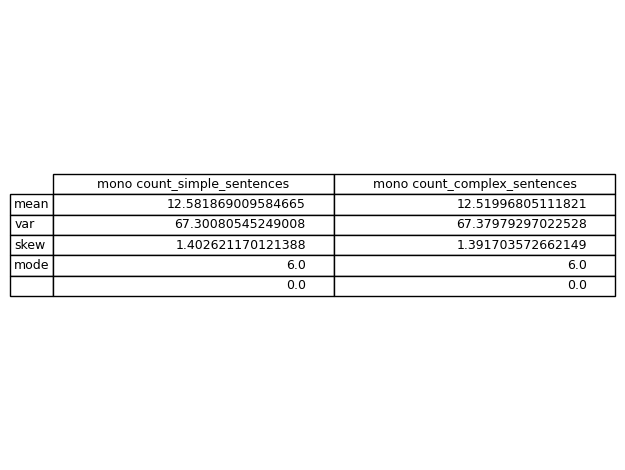

p value  0.7161754506160789
table_values  (8, 6)
table values after round 
  [[ 7.96615615e+01  1.98159354e+01  7.95644848e+01  1.98777316e+01
   9.70766770e-02  8.84038083e-01]
 [ 7.62064018e+01  2.00888280e+01  7.61023203e+01  2.00911798e+01
   1.04081470e-01  8.67184315e-01]
 [ 3.69641414e+01  8.44882953e+00  3.68872644e+01  8.42545517e+00
   7.68769970e-02  7.48867817e-01]
 [ 3.76321885e+00  1.44980753e+00  3.76789137e+00  1.45874285e+00
  -4.67252400e-03  8.81935086e-01]
 [ 3.96573482e+01  2.47183819e+01  3.95902556e+01  2.47319463e+01
   6.70926520e-02  8.86490935e-01]
 [ 2.29333067e+01  1.40378576e+01  2.28698083e+01  1.40472098e+01
   6.34984030e-02  8.23409534e-01]
 [ 4.59864217e+00  3.52952151e+00  4.59824281e+00  3.52975894e+00
   3.99361000e-04  9.94978609e-01]
 [ 1.25818690e+01  8.20370681e+00  1.25199681e+01  8.20851954e+00
   6.19009580e-02  7.16175451e-01]]
Data frame 
                         mu s    sigma s       mu c    sigma c  mu s - mu c  \
fernandez_huerta  79.66

<ipython-input-13-eaaddc8848d3>:111: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(data_frame.to_latex())


,mu s,sigma s,mu c,sigma c,mu s - mu c,p_value
fernandez_huerta,79.661562,19.815935,79.564485,19.877732,0.097077,0.884038
szigriszt_pazos,76.206402,20.088828,76.102320,20.091180,0.104081,0.867184
gutierrez_polini,36.964141,8.448830,36.887264,8.425455,0.076877,0.748868
crawford,3.763219,1.449808,3.767891,1.458743,-0.004673,0.881935
syllable count,39.657348,24.718382,39.590256,24.731946,0.067093,0.886491
word count,22.933307,14.037858,22.869808,14.047210,0.063498,0.823410
poly count,4.598642,3.529522,4.598243,3.529759,0.000399,0.994979
mono count,12.581869,8.203707,12.519968,8.208520,0.061901,0.716175


In [ ]:
name_file_dataset = Path(path_file_dataset).stem
print("Processing dataset: ", name_file_dataset)
data_frame_training = read_csv_libre_translate(path_file_dataset,columnName, complexName)
#data_frame_training  = readExcelSeveral(path_file_dataset)
print("dataset head")
#print(data_frame_training.head())
#print(data_frame_training.columns)
data_frame_training.columns = ['labels', 'text']

#print(data_frame_training.head())

pokemon_games = data_frame_training.loc[data_frame_training['text'].str.contains("#", case=False)]
print("Incorrect entries ", pokemon_games)

metrics_simple_sentences, columns = get_metrics(data_frame_training, take_complex = 0)
metrics_complex_sentences, columns = get_metrics(data_frame_training, take_complex = 1)
#print("Metrics from simple sentences")
#print(metrics_simple_sentences.head())
#print("Metrics from complex sentences")
#print(metrics_complex_sentences.head())
df = visualize_stats(metrics_simple_sentences, metrics_complex_sentences, name_file_dataset)
#df = pd.DataFrame(metrics_simple_sentences, columns= columns)
df

## PCA visualization
Use sklearn to visualize the data.

In [ ]:
!pip3 install ipympl

components  (2, 8)


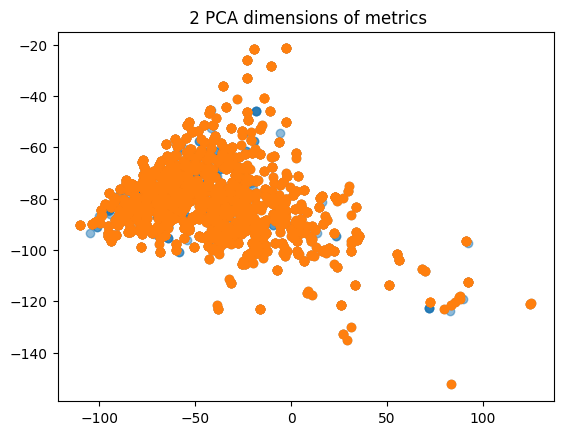

components  (3, 8)


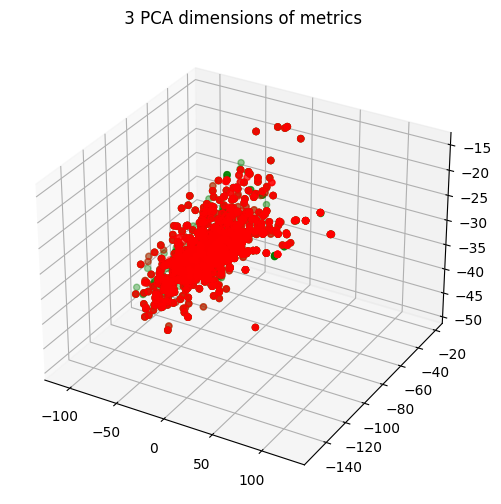

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


def visualize_pca(metrics_simple_sentences, metrics_complex_sentences, num_components = 2):
  #concat all data
  np_mat_simple = np.array(metrics_simple_sentences.values)
  np_mat_complex = np.array(metrics_complex_sentences.values)
  #print("np_mat_simple\n ", np_mat_simple)
  np_mat_all = np.concatenate((np_mat_simple, np_mat_complex), 0)
  #print("np_mat_all \n")
  #print(np_mat_all.shape)
  #https://www.jcchouinard.com/pca-with-python/
  # data scaling
  np_mat_all_scaled = StandardScaler().fit_transform(np_mat_all)
  #calculate pca
  pca_metrics = PCA(n_components = num_components)
  pca_metrics.fit(np_mat_all_scaled)
  #get the axis
  components = pca_metrics.components_
  print("components ", components.shape)
  mat_simple_pca = pca_metrics.transform(np_mat_simple)
  mat_complex_pca = pca_metrics.transform(np_mat_complex)
  #PCA of 2 components
  if(num_components == 2):
    fig = plt.figure()
    plt.scatter(mat_simple_pca[:, 0], mat_simple_pca[:, 1], alpha = 0.5)
    plt.scatter(mat_complex_pca[:, 0], mat_complex_pca[:, 1], alpha = 1)
    plt.title(" 2 PCA dimensions of metrics")
    plt.show()
  #PCA of 3 components...
  elif(num_components == 3):
    fig = plt.figure(figsize=(9, 6))
    ax = plt.axes(projection='3d')

    # Creating plot
    ax.scatter3D(mat_simple_pca[:, 0], mat_simple_pca[:, 1], mat_simple_pca[:, 2], color = "green")
    ax.scatter3D(mat_complex_pca[:, 0], mat_complex_pca[:, 1], mat_complex_pca[:, 2], color = "red")
    plt.title(" 3 PCA dimensions of metrics")
    plt.show()


visualize_pca(metrics_simple_sentences, metrics_complex_sentences, num_components = 2)
visualize_pca(metrics_simple_sentences, metrics_complex_sentences, num_components = 3)

# 2. Simple/Complex comparison of sentences: using EASSE and SBERT
Quality Estimation Features Traditional automatic metrics used for SS rely on the existence and
quality of references, and are often not enough to
analyse the complex process of simplification. QE
leverages both the source sentence and the output simplification to provide additional information on specific behaviours of simplification systems which are not reflected in metrics such as
SARI. EASSE uses QE features from Martin et al.
(2018)’s open-source repository5
. The QE features currently available are: the compression ratio of the simplification with respect to its source
sentence, its Levenshtein similarity, the average
number of sentence splits performed by the system, the proportion of exact matches (i.e. original
sentences left untouched), average proportion of
added word

In [ ]:
%ls
%cd Proyecto/Investigacion

 1-S-2020.gsheet
 1-S-2021.gsheet
 1-S-2022.gsheet
 1-S-2023.gsheet
 2-S-2020.gsheet
 2-S-2021.gsheet
 2-S-2022.gsheet
 2-S-2023.gsheet
 activos/
 AI/
 Algebra/
'Analisis pelicula Ambiente.gdoc'
 ANPI/
'App Censista 2020-03-11 14-16-19'/
'Arqui 1'/
'Arqui 2'/
'Bases de Datos'/
'Bertha Brenes - Kakigoori.Dossier Lección 1.pdf'
 brenesbrenesberta2017101642.docx
 CA/
'Calidad de vida.gdoc'
'Carta solicitud apelacion.gdoc'
 CC/
 Centros/
 commu/
'Copia de Plantilla Carta de Intención - Solicitud de Inclusión II-2021.docx.pdf'
 coreano/
' Cuestionarios LabCC.gdoc'
 Datos/
 datos-experimentales_Datos_experimentales_Campo_eléctrico_parte_I_bertha.xlsx
 DBA/
 Digitales/
 Discreta/
 Discretos/
'Diseño Analogico '/
'Documento sin título.gdoc'
 ecua/
 Emprendedores/
'enero de 2-S-2020.gsheet'
 Espe/
'Examen Ambiente Humano.gdoc'
'Fisica 2'/
'Fisica 3'/
'Fisica 4'/
 fitness/
 Formu/
'fotos Danza'/
 Frances/
'GT-OS-017-2021 Bertha Brenes Brenes.pdf'
'GT-OS-024-2021 Bertha Brenes Brenes.gdoc'


In [6]:
!git clone https://github.com/feralvam/easse.git
!ls

Cloning into 'easse'...
remote: Enumerating objects: 1964, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 1964 (delta 109), reused 96 (delta 96), pack-reused 1827
Receiving objects: 100% (1964/1964), 33.15 MiB | 21.65 MiB/s, done.
Resolving deltas: 100% (1231/1231), done.
drive  easse  sample_data


In [7]:
%cd easse


/content/easse


In [ ]:
%ls

demo/   example.sh  MANIFEST.in  requirements.txt  setup.py
easse/  LICENSE     README.md    setup.cfg         tests/


In [11]:
pip install fastapi kaleido python-multipart uvicorn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.


In [12]:
pip install -e .

Obtaining file:///content/easse
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/text-simplification-evaluation.git (to revision main) to /tmp/pip-install-nh7yz2c3/tseval_4f8005c172cc46009833b6a4ba91853a
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/text-simplification-evaluation.git /tmp/pip-install-nh7yz2c3/tseval_4f8005c172cc46009833b6a4ba91853a
  Resolved https://github.com/facebookresearch/text-simplification-evaluation.git to commit f335e2e27026321c7c3d1dd63857416c7e7397b2
  Preparing metadata (setup.py) ... done
  Using cached sacrebleu-2.3.1-py3-none-any.whl (118 kB)
  Using cached sacremoses-0.0.53.tar.gz (880 kB)
  Preparing metadata (setup.py) ... done
  Using cached stanfordnlp-0.2.0-py3-none-any.whl (158 kB)
  Using cached yattag-1.15.1.tar.gz (28 kB)
  Preparing metadata (setup.py) ... done
  Using cached bert_score-0.3.13-py3-none-any.whl (61 kB)
  Using cached simalign-0.3-py3-none-any.wh

In [ ]:
%ls

CODE_OF_CONDUCT.md  demo/    MANIFEST.in  requirements.txt  tests/   tseval.egg-info/
CONTRIBUTING.md     LICENSE  README.md    setup.py          tseval/


In [ ]:
%cd ..
!git clone https://github.com/facebookresearch/text-simplification-evaluation.git

/content/drive/MyDrive/TEC/Proyecto/Investigacion/text-simplification-evaluation
Cloning into 'text-simplification-evaluation'...
remote: Enumerating objects: 216, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 216 (delta 3), reused 8 (delta 3), pack-reused 207
Receiving objects: 100% (216/216), 8.19 MiB | 8.31 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [ ]:
%cd text-simplification-evaluation
!pip install -e .
!pip install -r requirements.txt

/content/drive/MyDrive/TEC/Proyecto/Investigacion/text-simplification-evaluation/text-simplification-evaluation
Obtaining file:///content/drive/MyDrive/TEC/Proyecto/Investigacion/text-simplification-evaluation/text-simplification-evaluation
  Preparing metadata (setup.py) ... done
  Attempting uninstall: tseval
    Found existing installation: tseval 1.0
    Uninstalling tseval-1.0:
      Successfully uninstalled tseval-1.0
  Running setup.py develop for tseval
  Cloning https://github.com/pytorch/fairseq (to revision e286243c68f1589a781488580fc19388714612be) to /tmp/pip-req-build-p_kryqzn
  Running command git clone --filter=blob:none --quiet https://github.com/pytorch/fairseq /tmp/pip-req-build-p_kryqzn
  Running command git rev-parse -q --verify 'sha^e286243c68f1589a781488580fc19388714612be'
  Running command git fetch -q https://github.com/pytorch/fairseq e286243c68f1589a781488580fc19388714612be
  Running command git checkout -q e286243c68f1589a781488580fc19388714612be
  Resolved h

In [13]:
pip install sacremoses easee scikit-learn sacrebleu tieval easepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Discarding https://files.pythonhosted.org/packages/7c/a5/bb484445c08a24143765d475b9c36eafcdaab6367fa67840ce4cbd621bc9/py_heideltime-1.0.5.tar.gz (from https://pypi.org/simple/py-heideltime/): Requested py-heideltime from https://files.pythonhosted.org/packages/7c/a5/bb484445c08a24143765d475b9c36eafcdaab6367fa67840ce4cbd621bc9/py_heideltime-1.0.5.tar.gz (from tieval) has inconsistent version: expected '1.0.5', but metadata has '0.0.0'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Simple example of EASSE

In [15]:
from easse.sari import corpus_sari
from easse.quality_estimation import corpus_quality_estimation

sari = corpus_sari(orig_sents=["About 95 species are currently accepted.", "The cat perched on the mat."],
            sys_sents=["About 95 you now get in.", "Cat on mat."],
            refs_sents=[["About 95 species are currently known.", "The cat sat on the mat."],
                        ["About 95 species are now accepted.", "The cat is on the mat."],
                        ["95 species are now accepted.", "The cat sat."]])



In [ ]:
from easse.quality_estimation import  corpus_quality_estimation

corpus_quality_estimation(orig_sentences=["About 95 species are currently accepted.", "The cat perched on the mat."],
            sys_sentences=["About 95 you now get in.", "Cat on mat."])

[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Unzipping misc/perluniprops.zip.


{'Compression ratio': 0.519163763066202,
 'Sentence splits': 1.0,
 'Levenshtein similarity': 0.5174242424242425,
 'Exact copies': 0.0,
 'Additions proportion': 0.3571428571428571,
 'Deletions proportion': 0.5714285714285714,
 'Lexical complexity score': 8.962826412022807}

## Simple example with SBERT

Use BETO for the embeddings
https://huggingface.co/espejelomar/sentece-embeddings-BETO

 bertin-project/bertin-roberta-base-spanish (doesnt work well)

or hiiamsid/sentence_similarity_spanish_es  (bad also)



In [16]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=b4a004f86894285c737370b27f2c8a2b8cd85b0df84825ccddcf1d1a2edd3b9a
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [20]:
from sentence_transformers import SentenceTransformer, util
import torch

ids = ["32_LibroBAC.pdf", "7474_LibroBAC.pdf"]

# Two lists of sentences
sentences1_simple_manually = ['A la vez, no conseguimos todo con dinero. Hay aspectos que no los da el dinero: nuestra credibilidad, la unión familiar, las amistades verdaderas, la felicidad, la armonía en nuestras relaciones, nuestra paz interior, las habilidades, los talentos, nuestra creatividad, las actitudes asumidas frente a las adversidades, la toma de decisiones apropiadas, amar nuestra labor, aportar al mundo los dones recibidos, resolver nuestros problemas, crecer personalmente, disfrutar de las cosas sencillas de la vida.',
             'La planeación o planiﬁcación también implica una decisión para la autodirección y el autocontrol efectivo de la vida. Esto es decisivo para el éxito, especialmente en el aspecto que en este libro más interesa: la seguridad ﬁnanciera personal y familiar para el futuro.']

#prompt: Simplifica el siguiente texto:
sentences1_bloomz = ['No se puede vivir sin dinero, se puede afirmar tambien que no solo de dinero vive el ser humano',
             'El equipo procedio a realizar la redaccion o construccion del libro.']


sentences_simple_tuner = ["Sin dinero no se puede vivir,  pudiéndose afirmar también en que no sólo de dinero vive el ser humano,  la familia y la sociedad aunque también de dinero.",
                          "Luego de haber obtenido la anterior información y haber hecho acopio de las fuentes bibliográficas y virtuales respectivas,  el equipo procedió a realizar la trabajo o construcción del libro."]

sentences1_simple_gpt3 = ['No se puede vivir sin dinero, pero tambien se necesita mas que dinero para vivir.',
             'Despues de tener la informacion y las fuentes necesarias, el equipo escribio el libro.']

sentences2_complex = ['Sin dinero no se puede vivir, pudiendose afirmar tambien en que no solo de dinero vive el ser humano, la familia y la sociedad aunque tambien de dinero.',
              'Luego de haber obtenido la anterior informacion y haber hecho acopio de las fuentes bibliograficas y virtuales respectivas, el equipo procedio a realizar la redaccion o construccion del libro.',
              ]

sentences_simple_mT5 = ["Sin dinero no se puede vivir,  pudiéndose afirmar también en que no solo de dinero vive el ser humano,  la familia y la sociedad,  aunque también de dinero.",
                        "Luego de haber obtenido la anterior información y haber hecho acopio de las fuentes bibliográficas y virtuales,  el equipo procedió a realizar la redacción o construcción del libro."]

sentences_pegasus = ["La seguridad social es la proteccin que una sociedad",
                        "La planeacin, adems de la previsin, imp"]

sentences_FastChat = ["El  dinero  es  una  herramienta  til  para  obtener  algo  que  no  podemos  conseguir  con  otros  medios.  Sin  embargo",
                        "La  planeación  es  una  decisión  clave  para  la  éxito  en  todo  aspecto,  ya  sea  personal  o  familiar.  En  este  libro"]

sentences_Llama = ["A la vez, no todo lo conseguimos con dinero: Nuestra credibilidad, la unión familiar, las amistades verdaderas, la felicidad, la armonía en nuestras relaciones, nuestra paz interior, las habilidades, los talentos, nuestra creatividad, las actitudes que asumimos frente a las adversidades, el tomar decisiones apropiadas, amar lo que hacemos, aportar al mundo los dones que hemos recibido, resolver nuestros propios problemas sin esperar que otros nos los resuelvan, crecer como personas, disfrutar de las cosas sencillas de la vida, etc. son aspectos que no nos los proporciona el dinero.",
                        "La planeación, o planiﬁcación, como también se le llama, además de la previsión, implica una decisión para la autodirección y el autocontrol efectivo de la vida, y esto es decisivo para el éxito, especialmente en el aspecto que en este libro más interesa: la seguridad ﬁnanciera personal y familiar para el futuro."]


sentences_alpaca = ["No nos proporciona el dinero. Nuestra credibilidad, la unión familiar, las",
                        "La planificación, o planificación, implica una decisión para la autodirección "]


#hiiamsid/sentence_similarity_spanish_es
#espejelomar/sentece-embeddings-BETO
def estimate_cos_similarity_sentences(sentences_simple, sentences_complex, id_transformer = "espejelomar/sentece-embeddings-BETO"):
  #load embedding model
  model = SentenceTransformer(id_transformer)

  num_sentences = len(sentences_simple)
  print(" NUM SENTENCES  ", num_sentences)
  #Compute embedding for both lists
  embeddings1 = model.encode(sentences_simple, convert_to_tensor=True)
  embeddings2 = model.encode(sentences_complex, convert_to_tensor=True)

  #Compute cosine-similarities
  cosine_scores = []
  #compare each pair of sentences
  for i in range(0, num_sentences):
    #the higher the more similar
    cosine_scores += [util.cos_sim(embeddings1[i, :], embeddings2[i, :])]

  cosine_scores_torch = torch.tensor(cosine_scores).unsqueeze(dim = 0).transpose(0, 1)

  return cosine_scores_torch.numpy()

print("----GPT 3 simplifications----")
cosine_scores_torch = estimate_cos_similarity_sentences(sentences1_simple_gpt3, sentences2_complex)
print(cosine_scores_torch)
print("----Manually simplifications----")
cosine_scores_torch = estimate_cos_similarity_sentences(sentences1_simple_manually, sentences2_complex)
print(cosine_scores_torch)
print("-----Tuner simplifications -----")
cosine_scores_torch = estimate_cos_similarity_sentences(sentences1_simple_manually, sentences_simple_tuner)
print(cosine_scores_torch)
print("-----mT5 simplifications -----")
cosine_scores_torch = estimate_cos_similarity_sentences(sentences1_simple_manually, sentences_simple_mT5)
print(cosine_scores_torch)
print("-----Pegasus simplifications -----")
cosine_scores_torch = estimate_cos_similarity_sentences(sentences1_simple_manually, sentences_pegasus)
print(cosine_scores_torch)
print("-----FastChat simplifications -----")
cosine_scores_torch = estimate_cos_similarity_sentences(sentences1_simple_manually, sentences_FastChat)
print(cosine_scores_torch)
print("-----Llama simplifications -----")
cosine_scores_torch = estimate_cos_similarity_sentences(sentences1_simple_manually, sentences_Llama)
print(cosine_scores_torch)
print("-----Alpaca simplifications -----")
cosine_scores_torch = estimate_cos_similarity_sentences(sentences1_simple_manually, sentences_alpaca)
print(cosine_scores_torch)


----GPT 3 simplifications----


Downloading:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/776 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/124 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/439M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/730k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

 NUM SENTENCES   2
[[0.86719275]
 [0.76057816]]
----Manually simplifications----
 NUM SENTENCES   2
[[0.72386646]
 [0.469414  ]]
-----Tuner simplifications -----
 NUM SENTENCES   2
[[0.7238664 ]
 [0.46035364]]
-----mT5 simplifications -----
 NUM SENTENCES   2
[[0.72606593]
 [0.47643209]]
-----Pegasus simplifications -----
 NUM SENTENCES   2
[[0.54260355]
 [0.61120296]]
-----FastChat simplifications -----
 NUM SENTENCES   2
[[0.5927882]
 [0.880722 ]]
-----Llama simplifications -----
 NUM SENTENCES   2
[[0.97308683]
 [0.9691555 ]]
-----Alpaca simplifications -----
 NUM SENTENCES   2
[[0.717329  ]
 [0.76886284]]


## Stats calculation with EASSE and SBERT

In [17]:

def visualize_stats_easse(metrics_sentences, name_file_dataset):
  column_names = metrics_sentences.columns
  print("column names ", column_names)
  #table_summaries_values
  table_values = np.zeros((len(column_names), 2))

  #concat whole data for reference
  np_mat_sentences = np.array(metrics_sentences.values)
  print("shape np_mat_sentences ", np_mat_sentences.shape)
  #np_mat_all = np.concatenate((np_mat_simple, np_mat_complex), 0)
  column_num = 0

  #get descriptive stats and histogram for each column
  for column_name in column_names:
    #data of the column
    data_column_sentence = np_mat_sentences[:, column_num]
    #get descriptive stats
    mean_sentence, var_sentence = np.mean(data_column_sentence), np.var(data_column_sentence)
    #store all the table values in the tensor
    table_values[column_num, :] = [mean_sentence, var_sentence]
    column_num += 1

  #generate values in latex file
  rowLabels = column_names
  table_values = np.round(table_values, decimals = 2)
  print("table values after round \n ", table_values)
  colLabels = ["mu s", "sigma^2 s"]
  data_frame = pd.DataFrame(table_values, columns = colLabels)
  data_frame.index = rowLabels
  data_frame.round(decimals = 2)
  print("Data frame \n ", data_frame)
  #store latex file
  with open(name_file_dataset + "_easse_stats.tex",'w') as tf:
    tf.write(data_frame.to_latex())
  return data_frame


## Calculate the metrics with EASSE

In [23]:
from pathlib import Path
import pandas as pd
def get_metrics_easse(path_str, columnName ="simple" , complexColumn= 'complex'):
    #accumulate all the sentences both simple and complex
    simple_texts_all = []
    complex_texts_all = []
    wrong_lines_counter = 0
    row_counter = 0
    list_easse_metrics = []
    data_frame_csv = pd.read_csv(path_str)
    #get number of sentences
    number_sentences = len(data_frame_csv)
    print("number of sentences in the dataframe ", number_sentences)
    #must be read by chunks as the csv is too big
    i = 0
    #matrix of metrics
    matrix_metrics = []
    list_simple_sentences = []
    list_complex_sentences = []
    for chunk_data_frame in pd.read_csv(path_str, chunksize=1):
        #get simple texts in spanish
        #this is an nd array
        simple_text_array = str(chunk_data_frame[columnName].values[0])
        list_simple_sentences += [simple_text_array]
        #preprocess string

        #get complex texts in spanish
        complex_text_array = str(chunk_data_frame[complexColumn].values[0])
        list_complex_sentences += [complex_text_array]
        #print("-------------------------------------------------")
        #print("complex sentence ", complex_text_array)
        #print("simple sentence ", simple_text_array)

        dict_metrics_sentence = corpus_quality_estimation(orig_sentences=[complex_text_array],
            sys_sentences=[simple_text_array])
        if(i == 0):
          #columns names are the keys of the dictionary
          columns_names = dict_metrics_sentence.keys()
          print("keys of the dictionary ", columns_names)
          i += 1
        list_metrics = list(dict_metrics_sentence.values())
        matrix_metrics += [list_metrics]
         # transform numpy to pandas dataframe
    data_metrics = np.array(matrix_metrics)


    columns_names = list(columns_names)
    #print("columns_names ", columns_names)
    #add the SBERT cosine similarity metric
    data_sbert = estimate_cos_similarity_sentences(list_simple_sentences, list_complex_sentences, "all-MiniLM-L6-v2")
    data_metrics = np.concatenate((data_metrics, data_sbert), 1)
    columns_names += ["SBERT cos. sim."]
    #Add the SBETO cosine similarity metric
    data_sbeto = estimate_cos_similarity_sentences(list_simple_sentences, list_complex_sentences)
    data_metrics = np.concatenate((data_metrics, data_sbeto), 1)
    columns_names += ["SBETO cos. sim."]
    print("data_metrics shape ", data_metrics.shape)

    data_frame_metrics = pd.DataFrame(data_metrics)
    data_frame_metrics.columns = columns_names


    return data_frame_metrics


# Analisis dataset

## Analysis of the Manually simplified dataset

In [ ]:

path_file_dataset = "/content/drive/MyDrive/TEC/Proyecto/Investigacion/manually_utf8.csv"
name_file_dataset = Path(path_file_dataset).stem
print("Processing dataset: ", name_file_dataset)
data_frame_training_easse_manually  = get_metrics_easse(path_file_dataset)
print(data_frame_training_easse_manually.head())
print(len(data_frame_training_easse_manually))
visualize_stats_easse(data_frame_training_easse_manually, name_file_dataset + "_easse")

Processing dataset:  manually_utf8
number of sentences in the dataframe  5313
keys of the dictionary  dict_keys(['Compression ratio', 'Sentence splits', 'Levenshtein similarity', 'Exact copies', 'Additions proportion', 'Deletions proportion', 'Lexical complexity score'])


 NUM SENTENCES   5313
 NUM SENTENCES   5313
data_metrics shape  (5313, 9)
   Compression ratio  Sentence splits  Levenshtein similarity  Exact copies  \
0           0.865132              1.0                0.811287           0.0   
1           0.751534              2.0                0.826620           0.0   
2           0.697436              1.0                0.815710           0.0   
3           0.668246              2.0                0.727273           0.0   
4           0.668449              2.0                0.730769           0.0   

   Additions proportion  Deletions proportion  Lexical complexity score  \
0              0.100917              0.247706                  9.515113   
1              0.089286              0.339286                  9.280706   
2              0.026316              0.342105                 10.541148   
3              0.200000              0.542857                  8.874221   
4              0.138889              0.500000                  9.348443   



<ipython-input-23-e9f525e5fe85>:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(data_frame.to_latex())


## Analysis of the Pegasus

### Dataset  5000

In [ ]:
path_file_dataset = '/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/salidaPegasus.csv'
name_file_dataset = Path(path_file_dataset).stem
print("Processing dataset: ", name_file_dataset)
data_frame_training_easse_pegasus  = get_metrics_easse(path_file_dataset, 'simplePegasus')
print(data_frame_training_easse_pegasus.head())
print(len(data_frame_training_easse_pegasus))
df = visualize_stats_easse(data_frame_training_easse_pegasus, name_file_dataset + "_easse")
df

Processing dataset:  salidaPegasus
number of sentences in the dataframe  5313
keys of the dictionary  dict_keys(['Compression ratio', 'Sentence splits', 'Levenshtein similarity', 'Exact copies', 'Additions proportion', 'Deletions proportion', 'Lexical complexity score'])
 NUM SENTENCES   5313
 NUM SENTENCES   5313
data_metrics shape  (5313, 9)
   Compression ratio  Sentence splits  Levenshtein similarity  Exact copies  \
0           0.092105              0.5                0.165663           0.0   
1           0.159509              1.0                0.275132           0.0   
2           0.297436              1.0                0.458498           0.0   
3           0.255924              1.0                0.407547           0.0   
4           0.240642              1.0                0.387931           0.0   

   Additions proportion  Deletions proportion  Lexical complexity score  \
0              0.009174              0.926606                 10.392123   
1              0.035714      

<ipython-input-23-e9f525e5fe85>:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(data_frame.to_latex())


### Dataset 2000

In [25]:
path_file_dataset = '/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/salidaPegasus_Finalrep.csv'
name_file_dataset = Path(path_file_dataset).stem
print("Processing dataset: ", name_file_dataset)
data_frame_training_easse_pegasus  = get_metrics_easse(path_file_dataset, 'simple', "Segmento")
print(data_frame_training_easse_pegasus.head())
print(len(data_frame_training_easse_pegasus))
visualize_stats_easse(data_frame_training_easse_pegasus, name_file_dataset + "_easse")

Processing dataset:  salidaPegasus_Finalrep
number of sentences in the dataframe  2504
keys of the dictionary  dict_keys(['Compression ratio', 'Sentence splits', 'Levenshtein similarity', 'Exact copies', 'Additions proportion', 'Deletions proportion', 'Lexical complexity score'])
 NUM SENTENCES   2504
 NUM SENTENCES   2504
data_metrics shape  (2504, 9)
   Compression ratio  Sentence splits  Levenshtein similarity  Exact copies  \
0                1.0              1.0                     1.0           1.0   
1                1.0              1.0                     1.0           1.0   
2                1.0              1.0                     1.0           1.0   
3                1.0              1.0                     1.0           1.0   
4                1.0              1.0                     1.0           1.0   

   Additions proportion  Deletions proportion  Lexical complexity score  \
0                   0.0                   0.0                  9.896010   
1                   

<ipython-input-17-b32721d35680>:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(data_frame.to_latex())


,mu s,sigma^2 s
Compression ratio,1.00,0.00
Sentence splits,1.00,0.00
Levenshtein similarity,1.00,0.00
Exact copies,1.00,0.00
Additions proportion,0.00,0.00
Deletions proportion,0.00,0.00
Lexical complexity score,9.53,0.91
SBERT cos. sim.,1.00,0.00
SBETO cos. sim.,1.00,0.00


## Analysis of the sample Llama

In [21]:
path_file_dataset = '/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/salidaLlama.csv'
name_file_dataset = Path(path_file_dataset).stem
print("Processing dataset: ", name_file_dataset)
data_frame_training_easse_llama  = get_metrics_easse(path_file_dataset, "simpleLlama")
print(data_frame_training_easse_llama.head())
print(len(data_frame_training_easse_llama))
df = visualize_stats_easse(data_frame_training_easse_llama, name_file_dataset + "_easse")
df

Processing dataset:  salidaLlama
number of sentences in the dataframe  5313
keys of the dictionary  dict_keys(['Compression ratio', 'Sentence splits', 'Levenshtein similarity', 'Exact copies', 'Additions proportion', 'Deletions proportion', 'Lexical complexity score'])


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

 NUM SENTENCES   5313
 NUM SENTENCES   5313
data_metrics shape  (5313, 9)
   Compression ratio  Sentence splits  Levenshtein similarity  Exact copies  \
0           1.000000              1.0                1.000000           1.0   
1           1.006135              2.0                0.996942           0.0   
2           1.000000              1.0                1.000000           1.0   
3           1.000000              1.0                1.000000           1.0   
4           1.000000              1.0                1.000000           1.0   

   Additions proportion  Deletions proportion  Lexical complexity score  \
0              0.000000                   0.0                  9.896010   
1              0.017544                   0.0                  9.280706   
2              0.000000                   0.0                 10.471921   
3              0.000000                   0.0                  9.896010   
4              0.000000                   0.0                  9.613603   



<ipython-input-17-b32721d35680>:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(data_frame.to_latex())


,mu s,sigma^2 s
Compression ratio,1.01,0.00
Sentence splits,1.31,0.21
Levenshtein similarity,1.00,0.00
Exact copies,0.64,0.23
Additions proportion,0.02,0.00
Deletions proportion,0.00,0.00
Lexical complexity score,9.65,0.39
SBERT cos. sim.,1.00,0.00
SBETO cos. sim.,1.00,0.00


In [24]:
path_file_dataset = '/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/salidaLlama_Finalrep.csv'
name_file_dataset = Path(path_file_dataset).stem
print("Processing dataset: ", name_file_dataset)
data_frame_training_easse_llama  = get_metrics_easse(path_file_dataset, "simple", 'Segmento')
print(data_frame_training_easse_llama.head())
print(len(data_frame_training_easse_llama))
df = visualize_stats_easse(data_frame_training_easse_llama, name_file_dataset + "_easse")
df

Processing dataset:  salidaLlama_Finalrep
number of sentences in the dataframe  2504
keys of the dictionary  dict_keys(['Compression ratio', 'Sentence splits', 'Levenshtein similarity', 'Exact copies', 'Additions proportion', 'Deletions proportion', 'Lexical complexity score'])
 NUM SENTENCES   2504
 NUM SENTENCES   2504
data_metrics shape  (2504, 9)
   Compression ratio  Sentence splits  Levenshtein similarity  Exact copies  \
0           1.000000              1.0                1.000000           1.0   
1           1.011111              2.0                0.994475           0.0   
2           1.000000              1.0                1.000000           1.0   
3           1.000000              1.0                1.000000           1.0   
4           1.000000              1.0                1.000000           1.0   

   Additions proportion  Deletions proportion  Lexical complexity score  \
0              0.000000                   0.0                  9.896010   
1              0.02631

<ipython-input-17-b32721d35680>:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(data_frame.to_latex())


,mu s,sigma^2 s
Compression ratio,1.01,0.00
Sentence splits,1.28,0.20
Levenshtein similarity,1.00,0.00
Exact copies,0.67,0.22
Additions proportion,0.02,0.00
Deletions proportion,0.00,0.00
Lexical complexity score,9.54,0.89
SBERT cos. sim.,1.00,0.00
SBETO cos. sim.,1.00,0.00


## Analysis of the sample Fast Chat

In [ ]:
path_file_dataset = '/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/salidaFastChat.csv'
name_file_dataset = Path(path_file_dataset).stem
print("Processing dataset: ", name_file_dataset)
data_frame_training_easse_FastChat  = get_metrics_easse(path_file_dataset, "simpleFastChat")
print(data_frame_training_easse_FastChat.head())
print(len(data_frame_training_easse_FastChat))
visualize_stats_easse(data_frame_training_easse_FastChat, name_file_dataset + "_easse")

Processing dataset:  salidaFastChat
number of sentences in the dataframe  100
keys of the dictionary  dict_keys(['Compression ratio', 'Sentence splits', 'Levenshtein similarity', 'Exact copies', 'Additions proportion', 'Deletions proportion', 'Lexical complexity score'])
 NUM SENTENCES   100
 NUM SENTENCES   100
data_metrics shape  (100, 9)
   Compression ratio  Sentence splits  Levenshtein similarity  Exact copies  \
0                1.0              1.0                     1.0           1.0   
1                1.0              1.0                     1.0           1.0   
2                1.0              1.0                     1.0           1.0   
3                1.0              1.0                     1.0           1.0   
4                1.0              1.0                     1.0           1.0   

   Additions proportion  Deletions proportion  Lexical complexity score  \
0                   0.0                   0.0                  9.896010   
1                   0.0         

<ipython-input-23-e9f525e5fe85>:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(data_frame.to_latex())


# Analysis of the sample Alpaca

In [27]:
path_file_dataset = '/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/salidaAlpaca.csv'
name_file_dataset = Path(path_file_dataset).stem
print("Processing dataset: ", name_file_dataset)
data_frame_training_easse_Alpaca  = get_metrics_easse(path_file_dataset, "simpleAlpaca")
print(data_frame_training_easse_Alpaca.head())
print(len(data_frame_training_easse_Alpaca))
visualize_stats_easse(data_frame_training_easse_Alpaca, name_file_dataset + "_easse")

Processing dataset:  salidaAlpaca
number of sentences in the dataframe  5313
keys of the dictionary  dict_keys(['Compression ratio', 'Sentence splits', 'Levenshtein similarity', 'Exact copies', 'Additions proportion', 'Deletions proportion', 'Lexical complexity score'])
 NUM SENTENCES   5313
 NUM SENTENCES   5313
data_metrics shape  (5313, 9)
   Compression ratio  Sentence splits  Levenshtein similarity  Exact copies  \
0           1.018092              1.0                0.991035           0.0   
1           1.033742              1.0                0.983409           0.0   
2           1.056410              1.0                0.972569           0.0   
3           1.052133              1.0                0.974596           0.0   
4           1.058824              1.0                0.971429           0.0   

   Additions proportion  Deletions proportion  Lexical complexity score  \
0              0.018018                   0.0                  9.896010   
1              0.034483       

<ipython-input-17-b32721d35680>:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(data_frame.to_latex())


,mu s,sigma^2 s
Compression ratio,1.09,0.00
Sentence splits,1.00,0.00
Levenshtein similarity,0.96,0.00
Exact copies,0.00,0.00
Additions proportion,0.08,0.00
Deletions proportion,0.00,0.00
Lexical complexity score,9.65,0.39
SBERT cos. sim.,0.96,0.00
SBETO cos. sim.,0.97,0.00


In [26]:
path_file_dataset = '/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/salidaAlpaca_Finalrep.csv'
name_file_dataset = Path(path_file_dataset).stem
print("Processing dataset: ", name_file_dataset)
data_frame_training_easse_Alpaca  = get_metrics_easse(path_file_dataset, "simple", "Segmento")
print(data_frame_training_easse_Alpaca.head())
print(len(data_frame_training_easse_Alpaca))
visualize_stats_easse(data_frame_training_easse_Alpaca, name_file_dataset + "_easse")

Processing dataset:  salidaAlpaca_Finalrep
number of sentences in the dataframe  2504
keys of the dictionary  dict_keys(['Compression ratio', 'Sentence splits', 'Levenshtein similarity', 'Exact copies', 'Additions proportion', 'Deletions proportion', 'Lexical complexity score'])
 NUM SENTENCES   2504
 NUM SENTENCES   2504
data_metrics shape  (2504, 9)
   Compression ratio  Sentence splits  Levenshtein similarity  Exact copies  \
0                1.0              1.0                     1.0           1.0   
1                1.0              1.0                     1.0           1.0   
2                1.0              1.0                     1.0           1.0   
3                1.0              1.0                     1.0           1.0   
4                1.0              1.0                     1.0           1.0   

   Additions proportion  Deletions proportion  Lexical complexity score  \
0                   0.0                   0.0                  9.896010   
1                   0

<ipython-input-17-b32721d35680>:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(data_frame.to_latex())


,mu s,sigma^2 s
Compression ratio,1.00,0.00
Sentence splits,1.00,0.00
Levenshtein similarity,1.00,0.00
Exact copies,1.00,0.00
Additions proportion,0.00,0.00
Deletions proportion,0.00,0.00
Lexical complexity score,9.53,0.91
SBERT cos. sim.,1.00,0.00
SBETO cos. sim.,1.00,0.00


## Statistical analysis tests

Create the data frame with all the data.

In [ ]:

data_frame_training_easse_pegasus["System"] = "Pegasus"

data_frame_training_easse_llama["System"] = "Llama"


data_frame_training_easse_FastChat["System"] = "FastChat"

data_frame_training_easse_Alpaca["System"] = "Alpaca"


print(data_frame_training_easse_FastChat)
print(data_frame_training_easse_Alpaca)
print(data_frame_training_easse_llama)
print(data_frame_training_easse_pegasus)

data_frame_all_systems = pd.concat([data_frame_training_easse_FastChat,data_frame_training_easse_pegasus, data_frame_training_easse_llama, data_frame_training_easse_pegasus])
data_frame_all_systems.to_csv("/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/data_frame_all_systems_easse.csv")
print(data_frame_all_systems)

    Compression ratio  Sentence splits  Levenshtein similarity  Exact copies  \
0                 1.0              1.0                     1.0           1.0   
1                 1.0              1.0                     1.0           1.0   
2                 1.0              1.0                     1.0           1.0   
3                 1.0              1.0                     1.0           1.0   
4                 1.0              1.0                     1.0           1.0   
..                ...              ...                     ...           ...   
95                1.0              1.0                     1.0           1.0   
96                1.0              1.0                     1.0           1.0   
97                1.0              1.0                     1.0           1.0   
98                1.0              1.0                     1.0           1.0   
99                1.0              1.0                     1.0           1.0   

    Additions proportion  Deletions pro

In [ ]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=5f458b774f0375521a442336b63c173051013b49b10ec3b437e26916c40d8556
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import pingouin as pg
import seaborn as sns
import pandas as pd

data_frame_easse_metrics = pd.read_csv('/content/drive/MyDrive/TEC/Proyecto/Investigacion/Dataset5000/data_frame_all_systems_easse.csv')
#print(data_frame_easse_metrics)

def compute_statistical_analysis(data_frame_easse_metrics):

  header_rows_1, header_rows_2, p_values_levensthein = compute_statistical_test_one_variable(data_frame_easse_metrics, 'Levenshtein similarity')
  #compute stats per variable
  _, _, p_values_compression = compute_statistical_test_one_variable(data_frame_easse_metrics, 'Compression ratio')
  _, _, p_values_splits = compute_statistical_test_one_variable(data_frame_easse_metrics, 'Sentence splits')
  _, _, p_values_additions =compute_statistical_test_one_variable(data_frame_easse_metrics, "Additions proportion")
  _, _, p_values_deletions = compute_statistical_test_one_variable(data_frame_easse_metrics, "Deletions proportion")
  _, _, p_values_sbert = compute_statistical_test_one_variable(data_frame_easse_metrics, "SBERT cos. sim.")
  _, _, p_values_sbeto = compute_statistical_test_one_variable(data_frame_easse_metrics, "SBETO cos. sim.")
  _, _, p_values_lex_complex = compute_statistical_test_one_variable(data_frame_easse_metrics, "Lexical complexity score")
  dict_data = {'D. A.':header_rows_1[1:], 'D. B.':header_rows_2[1:], p_values_compression[0]:p_values_compression[1 :], p_values_splits[0] : p_values_splits[1 :], p_values_additions[0]:p_values_additions[1 :], p_values_deletions[0]:p_values_deletions[1 :], p_values_sbert[0]:p_values_sbert[1 :], p_values_sbeto[0]:p_values_sbeto[1 :], p_values_lex_complex[0]:p_values_lex_complex[1 :]}
  data_frame_stats_easse = pd.DataFrame(dict_data)
  pd.set_option('display.float_format', lambda x: '%.3f' % x)
  data_frame_stats_easse.round(decimals = 3)
  #data_frame_stats_easse.index = False
  #store latex file
  with open("summary_easse_stats_wilcoxon.tex",'w') as tf:
    tf.write(data_frame_stats_easse.to_latex())
  return data_frame_stats_easse

def compute_statistical_test_one_variable(data_frame_easse_metrics, variable_name):
  #t-test pair wise
  #dv: dependent variable, variable of interest
  #within: independent variable
  #subject: subject column
  print("-------Variable to analyze ", variable_name, "-----------")
  #print("Pair wise t test")

  print("Check normality ")
  print(pg.normality(data_frame_easse_metrics, group='System', dv=variable_name))
  print("Check homoscedasticity")
  print(pg.homoscedasticity(data_frame_easse_metrics, group='System', dv=variable_name))
  #homoscedasticity? no
  print("Tukey test")
  print(pg.pairwise_tukey(data_frame_easse_metrics, between='System', dv=variable_name))
  #tukey test does not apply
  #welch anova
  print("welch anova, is there at least one treatment different?")
  print(pg.welch_anova(data = data_frame_easse_metrics, between = 'System',  dv=variable_name))
  print("Games Howell")
  print(pg.pairwise_gameshowell(data = data_frame_easse_metrics, between = 'System',  dv=variable_name))
  #perform a non parametric pair wise wilcoxon test, as the data does not have equiv. variance and is not gaussian
  stats_results = pg.pairwise_tests(parametric = False, dv=variable_name, within='System', data=data_frame_easse_metrics)
  header_rows_1 = stats_results.iloc[:, 1].values.tolist()
  header_rows_2 = stats_results.iloc[:, 2].values.tolist()
  p_values = stats_results.iloc[:, 7].values.tolist()

  #print("Stats results for variable ", variable_name, "\n", stats_results)
  return [""] + header_rows_1, [""] + header_rows_2, [variable_name] + p_values
compute_statistical_analysis(data_frame_easse_metrics)

-------Variable to analyze  Levenshtein similarity -----------
Check normality 
                 W          pval  normal
System                                  
FastChat  1.000000  1.000000e+00    True
Pegasus   0.983402  2.331951e-33   False
Llama     0.596625  0.000000e+00   False
Check homoscedasticity
                  W  pval  equal_var
levene  5293.470657   0.0      False
Tukey test
          A        B   mean(A)   mean(B)      diff        se           T  \
0  FastChat    Llama  1.000000  0.996293  0.003707  0.016087    0.230406   
1  FastChat  Pegasus  1.000000  0.545306  0.454694  0.016013   28.396140   
2     Llama  Pegasus  0.996293  0.545306  0.450988  0.002678  168.408041   

        p-tukey    hedges  
0  9.711591e-01  0.542818  
1  2.611245e-13  2.333607  
2  2.611245e-13  2.820807  
welch anova, is there at least one treatment different?
   Source  ddof1        ddof2    F  p-unc       np2
0  System      2  9443.851833  0.0    1.0  0.641731
Games Howell


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1343: RuntimeWarning: invalid value encountered in double_scalars
  adj_grandmean = (weights * grp.mean()).sum() / weights.sum()


          A        B   mean(A)   mean(B)      diff        se           T  \
0  FastChat    Llama  1.000000  0.996293  0.003707  0.000095   39.208002   
1  FastChat  Pegasus  1.000000  0.545306  0.454694  0.001899  239.457893   
2     Llama  Pegasus  0.996293  0.545306  0.450988  0.001901  237.212101   

             df          pval    hedges  
0   5312.000000  0.000000e+00  0.542818  
1  10625.000000  0.000000e+00  2.333607  
2  10677.604515  5.693557e-12  2.820807  
-------Variable to analyze  Compression ratio -----------
Check normality 
                 W  pval  normal
System                          
FastChat  1.000000   1.0    True
Pegasus   0.773309   0.0   False
Llama     0.578245   0.0   False
Check homoscedasticity
                  W  pval  equal_var
levene  1672.946909   0.0      False
Tukey test
          A        B   mean(A)   mean(B)      diff        se           T  \
0  FastChat    Llama  1.000000  1.007417 -0.007417  0.023315   -0.318129   
1  FastChat  Pegasus  1.000

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = 

                  W  pval  equal_var
levene  1079.904544   0.0      False
Tukey test
          A        B   mean(A)   mean(B)      diff        se          T  \
0  FastChat    Llama  1.000000  1.312196 -0.312196  0.033523  -9.312920   
1  FastChat  Pegasus  1.000000  1.027404 -0.027404  0.033368  -0.821286   
2     Llama  Pegasus  1.312196  1.027404  0.284792  0.005580  51.033933   

        p-tukey    hedges  
0  2.611245e-13 -0.684933  
1  6.898072e-01 -0.111740  
2  2.611245e-13  0.854810  
welch anova, is there at least one treatment different?
   Source  ddof1        ddof2    F  p-unc       np2
0  System      2  9443.851833  0.0    1.0  0.140343
Games Howell
          A        B   mean(A)   mean(B)      diff        se          T  \
0  FastChat    Llama  1.000000  1.312196 -0.312196  0.006310 -49.473012   
1  FastChat  Pegasus  1.000000  1.027404 -0.027404  0.002390 -11.465974   
2     Llama  Pegasus  1.312196  1.027404  0.284792  0.006748  42.204569   

            df  pval    hedg

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1343: RuntimeWarning: invalid value encountered in double_scalars
  adj_grandmean = (weights * grp.mean()).sum() / weights.sum()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  re

          A        B   mean(A)   mean(B)      diff        se          T  \
0  FastChat    Llama  0.000000  0.015996 -0.015996  0.008064  -1.983560   
1  FastChat  Pegasus  0.000000  0.070068 -0.070068  0.008027  -8.728869   
2     Llama  Pegasus  0.015996  0.070068 -0.054071  0.001342 -40.277801   

        p-tukey    hedges  
0  1.162759e-01 -0.597771  
1  2.612355e-13 -0.731087  
2  2.611245e-13 -0.674647  
welch anova, is there at least one treatment different?
   Source  ddof1        ddof2            F  p-unc       np2
0  System      2  9443.851833  3745.786009    0.0  0.094035
Games Howell
          A        B   mean(A)   mean(B)      diff        se          T  \
0  FastChat    Llama  0.000000  0.015996 -0.015996  0.000370 -43.177273   
1  FastChat  Pegasus  0.000000  0.070068 -0.070068  0.000934 -75.018824   
2     Llama  Pegasus  0.015996  0.070068 -0.054071  0.001005 -53.813290   

             df  pval    hedges  
0   5312.000000   0.0 -0.597771  
1  10625.000000   0.0 -0.7310

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = 

          A        B   mean(A)   mean(B)      diff        se           T  \
0  FastChat    Llama  0.000000  0.000532 -0.000532  0.000117   -4.547828   
1  FastChat  Pegasus  0.000000  0.633600 -0.633600  0.002016 -314.281674   
2     Llama  Pegasus  0.000532  0.633600 -0.633068  0.002019 -313.491354   

             df          pval    hedges  
0   5312.000000  1.651423e-05 -0.062963  
1  10625.000000  0.000000e+00 -3.062793  
2  10696.330214  3.407052e-12 -3.729113  
-------Variable to analyze  SBERT cos. sim. -----------
Check normality 
                 W          pval  normal
System                                  
FastChat  0.856329  2.046415e-08   False
Pegasus   0.955101  0.000000e+00   False
Llama     0.490658  0.000000e+00   False
Check homoscedasticity
                  W  pval  equal_var
levene  3668.255922   0.0      False
Tukey test
          A        B   mean(A)   mean(B)      diff        se           T  \
0  FastChat    Llama  1.000000  0.997996  0.002004  0.012111    0

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = 

                  W  pval  equal_var
levene  4253.214713   0.0      False
Tukey test
          A        B   mean(A)   mean(B)      diff        se           T  \
0  FastChat    Llama  1.000000  0.996652  0.003348  0.010988    0.304701   
1  FastChat  Pegasus  1.000000  0.724270  0.275730  0.010937   25.209624   
2     Llama  Pegasus  0.996652  0.724270  0.272382  0.001829  148.908248   

        p-tukey    hedges  
0  9.501108e-01  0.465576  
1  2.611245e-13  2.072623  
2  2.611245e-13  2.494189  
welch anova, is there at least one treatment different?
   Source  ddof1        ddof2             F  p-unc       np2
0  System      2  9443.852003  23179.674244    0.0  0.583442
Games Howell
          A        B   mean(A)   mean(B)      diff        se           T  \
0  FastChat    Llama  1.000000  0.996652  0.003348  0.000100   33.628741   
1  FastChat  Pegasus  1.000000  0.724270  0.275730  0.001296  212.677523   
2     Llama  Pegasus  0.996652  0.724270  0.272382  0.001300  209.478210   

  

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encou

,D. A.,D. B.,Compression ratio,Sentence splits,Additions proportion,Deletions proportion,SBERT cos. sim.,SBETO cos. sim.,Lexical complexity score
0,FastChat,Llama,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,FastChat,Pegasus,1.000,1.000,1.000,1.000,1.000,1.000,1.000
2,Llama,Pegasus,1.000,1.000,1.000,1.000,1.000,1.000,1.000


# Metrics with multiple references

In [ ]:
import pandas as pd

def calculate_metrics_multiple_references(path_file_simplifications, path_file_references, num_replicas = 4):
  data_frame_simplifications =  pd.read_csv(path_file_simplifications, encoding="utf_8")
  data_frame_references =  pd.read_csv(path_file_references)
  #go through each sentence in the simplifications file and look for its references
  for chunk_data_frame in pd.read_csv(path_file_references, chunksize=1):
    #id current sentence
    id_sentence =  str(chunk_data_frame["idFinal"].values[0])
    #get simple texts in spanish
    #this is an nd array
    simple_text_array = str(data_frame_simplifications[data_frame_simplifications["id_final"] == id_sentence]["simple"].values[0])
    complex_text_array = str(data_frame_simplifications[data_frame_simplifications["id_final"] == id_sentence]["complex"].values[0])

    print("id_sentence ", id_sentence)
    print("complex_text_array: ", complex_text_array)
    print("simple_text_array: ", simple_text_array)
    #get the reference sentences to calculate the metrics
    list_references = []
    for i in range(0, num_replicas):
      simple_column = "simple" + str(i + 1)
      print(data_frame_references[data_frame_references["idFinal"] == id_sentence])
      list_references += [data_frame_references[data_frame_references["idFinal"] == id_sentence][simple_column].iloc[0]]
    print("list references \n ", list_references)
    break


path_file_references = "/content/drive/MyDrive/DATASETS_FINANCIAL_TEXT_SIMPLIFICATION/Datasets_text_simplification_spanish_paper/validation_dataset_replicas4_utf8.csv"
path_file_simplifications = "/content/drive/MyDrive/DATASETS_FINANCIAL_TEXT_SIMPLIFICATION/Datasets_text_simplification_spanish_paper/gpt_3_10.csv"
calculate_metrics_multiple_references(path_file_simplifications, path_file_references)

id_sentence  A4_LibroBAC.pdf
complex_text_array:  El no recibir educación en tan sustantivos aspectos, además de que pone en duda la educación integral que tanto se pregona, ocasiona que las personas vivan y tengan que responder, después de recibir su educación, con un contundente analfabetismo económico y financiero en un entorno que, además de otras características, lo es también económico y financiero.
simple_text_array:  La falta de educación en temas económicos y financieros es un grave problema que afecta a muchas personas. Esto ocasiona que vivan y tengan que responder con un analfabetismo económico y financiero en un entorno que es también económico y financiero.
   Unnamed: 0          idFinal  \
0           1  A4_LibroBAC.pdf   

                                             complex  \
0  El no recibir educación en tan sustantivos asp...   

                                             simple1  \
0  No recibir educación sobre estos importantes a...   

                         